# WRF basic notebook

This notebook does some basic WRF comparisons without using LDCPY.

On NCAR's Jupyterhub, environment NPL 2024b is a good option.


In [4]:
# conda env:npl_2024b
import os

import cartopy
import cmocean
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import xwrf
from cartopy import crs as ccrs

%matplotlib inline

To look at SPERR-compressed data, you need the HDF5 plugin installed and the path specified in HDF5_PLUGIN_PATH. So let's verify that:

In [6]:
os.environ["HDF5_PLUGIN_PATH"]

KeyError: 'HDF5_PLUGIN_PATH'

In [3]:
mydir = "/glade/derecho/scratch/abaker/wrf_compare/"
file2d = "wrf2d.nc"
file3d = "wrf3d.nc"
o_file2d = mydir + "orig/" + file2d
o_file3d = mydir + "orig/" + file3d
c_file2d = mydir + "gbr_3/" + file2d
c_file3d = mydir + "gbr_3/" + file3d

fileconsts = mydir + "wrfconstants_usgs404.nc"

sperr_file2d = "/glade/u/home/shaomeng/scratch/CONUS404_test/psnr100/wrf2d_d01_2020-07-01_00:00:00"
# same as above
# sperr_file2d =  mydir + "sperr_p100/" + file2d

In [4]:
# open and process wrf files to work with properly with xarray
ds_o_2d = xr.open_dataset(o_file2d, engine="netcdf4").xwrf.postprocess()
ds_o_3d = xr.open_dataset(o_file3d, engine="netcdf4").xwrf.postprocess()
ds_c_2d = xr.open_dataset(c_file2d, engine="netcdf4").xwrf.postprocess()
ds_c_3d = xr.open_dataset(c_file3d, engine="netcdf4").xwrf.postprocess()

In [5]:
ds_sperr_2d = xr.open_dataset(sperr_file2d, engine="netcdf4").xwrf.postprocess()

In [6]:
# lat and lon info is in the const file (unless you are using the wrf rda data, when you don't need this)
ds_const = xr.open_dataset(fileconsts, engine="netcdf4").xwrf.postprocess()

In [9]:
ds_const.coords

Coordinates:
    XLAT     (y, x) float32 6MB ...
    XLONG    (y, x) float32 6MB ...
    XLAT_U   (y, x_stag) float32 6MB ...
    XLONG_U  (y, x_stag) float32 6MB ...
    XLAT_V   (y_stag, x) float32 6MB ...
    XLONG_V  (y_stag, x) float32 6MB ...
    XTIME    (Time) datetime64[ns] 8B 1979-10-01
  * z        (z) float32 200B 0.9969 0.9901 0.9821 ... 0.0161 0.009015 0.0028
  * z_stag   (z_stag) float32 204B 1.0 0.9938 0.9864 ... 0.01243 0.0056 0.0
  * Time     (Time) datetime64[ns] 8B 1979-10-01
  * x        (x) float64 11kB -2.732e+06 -2.728e+06 ... 2.728e+06 2.732e+06
  * y_stag   (y_stag) float64 8kB -2.03e+06 -2.026e+06 ... 2.026e+06 2.03e+06
  * y        (y) float64 8kB -2.028e+06 -2.024e+06 ... 2.024e+06 2.028e+06
  * x_stag   (x_stag) float64 11kB -2.734e+06 -2.73e+06 ... 2.73e+06 2.734e+06

In [10]:
# get the lat and lon from the coords
wrf_lon = ds_const.coords["XLONG"]
wrf_lat = ds_const.coords["XLAT"]
# for V vars
wrf_lon_v = ds_const.coords["XLONG_U"]
wrf_lat_v = ds_const.coords["XLAT_U"]
# for U vars
wrf_lon_u = ds_const.coords["XLONG_U"]
wrf_lat_u = ds_const.coords["XLAT_U"]

In [12]:
ds_o_2d

<xarray.Dataset> Size: 1GB
Dimensions:         (Time: 1, y: 1015, x: 1367, soil_layers_stag: 4,
                     snow_layers_stag: 3, snso_layers_stag: 7, x_stag: 1368,
                     y_stag: 1016)
Coordinates:
    XTIME           (Time) datetime64[ns] 8B ...
  * Time            (Time) datetime64[ns] 8B 2020-07-01
  * x               (x) float64 11kB -2.732e+06 -2.728e+06 ... 2.732e+06
  * y_stag          (y_stag) float64 8kB -2.03e+06 -2.026e+06 ... 2.03e+06
  * y               (y) float64 8kB -2.028e+06 -2.024e+06 ... 2.028e+06
  * x_stag          (x_stag) float64 11kB -2.734e+06 -2.73e+06 ... 2.734e+06
Dimensions without coordinates: soil_layers_stag, snow_layers_stag,
                                snso_layers_stag
Data variables: (12/192)
    Times           (Time) |S19 19B b'2020-07-01_00:00:00'
    Q2              (Time, y, x) float32 6MB ...
    T2              (Time, y, x) float32 6MB ...
    TH2             (Time, y, x) float32 6MB ...
    PSFC            (Time, y, x) float32 6MB ...
    U10             (Time, y, x) float32 6MB ...
    ...              ...
    REFL_10CM       (Time, y, x) float32 6MB ...
    QVAPOR          (Time, y, x) float32 6MB ...
    U               (Time, y, x_stag) float32 6MB ...
    V               (Time, y_stag, x) float32 6MB ...
    W               (Time, y, x) float32 6MB ...
    wrf_projection  object 8B +proj=lcc +x_0=0 +y_0=0 +a=6370000 +b=6370000 +...
Attributes: (12/148)
    TITLE:                            OUTPUT FROM WRF V3.9.1.1 MODEL
    START_DATE:                      2020-06-05_00:00:00
    SIMULATION_START_DATE:           1979-10-01_00:00:00
    WEST-EAST_GRID_DIMENSION:        1368
    SOUTH-NORTH_GRID_DIMENSION:      1016
    BOTTOM-TOP_GRID_DIMENSION:       51
    ...                              ...
    Project:                         USGS CONUS404
    Division:                        NCAR/RAL/HAP
    Contacts:                        CHANGHAI LIU (chliu@ucar.edu), KYOKO IKE...
    NCO:                             netCDF Operators version 5.0.3 (Homepage...
    history:                         Wed May  4 13:07:22 2022: ncrcat -A -vW ...
    history_of_appended_files:       Wed May  4 13:07:22 2022: Appended file ...

In [13]:
ds_sperr_2d

<xarray.Dataset> Size: 1GB
Dimensions:         (Time: 1, y: 1015, x: 1367, soil_layers_stag: 4,
                     snow_layers_stag: 3, snso_layers_stag: 7, x_stag: 1368,
                     y_stag: 1016)
Coordinates:
    XTIME           (Time) datetime64[ns] 8B ...
  * Time            (Time) datetime64[ns] 8B 2020-07-01
  * x               (x) float64 11kB -2.732e+06 -2.728e+06 ... 2.732e+06
  * y_stag          (y_stag) float64 8kB -2.03e+06 -2.026e+06 ... 2.03e+06
  * y               (y) float64 8kB -2.028e+06 -2.024e+06 ... 2.028e+06
  * x_stag          (x_stag) float64 11kB -2.734e+06 -2.73e+06 ... 2.734e+06
Dimensions without coordinates: soil_layers_stag, snow_layers_stag,
                                snso_layers_stag
Data variables: (12/192)
    TV              (Time, y, x) float32 6MB ...
    LAI             (Time, y, x) float32 6MB ...
    Times           (Time) |S19 19B b'2020-07-01_00:00:00'
    Q2              (Time, y, x) float32 6MB ...
    T2              (Time, y, x) float32 6MB ...
    TH2             (Time, y, x) float32 6MB ...
    ...              ...
    REFL_10CM       (Time, y, x) float32 6MB ...
    QVAPOR          (Time, y, x) float32 6MB ...
    U               (Time, y, x_stag) float32 6MB ...
    V               (Time, y_stag, x) float32 6MB ...
    W               (Time, y, x) float32 6MB ...
    wrf_projection  object 8B +proj=lcc +x_0=0 +y_0=0 +a=6370000 +b=6370000 +...
Attributes: (12/148)
    TITLE:                            OUTPUT FROM WRF V3.9.1.1 MODEL
    START_DATE:                      2020-06-05_00:00:00
    SIMULATION_START_DATE:           1979-10-01_00:00:00
    WEST-EAST_GRID_DIMENSION:        1368
    SOUTH-NORTH_GRID_DIMENSION:      1016
    BOTTOM-TOP_GRID_DIMENSION:       51
    ...                              ...
    Project:                         USGS CONUS404
    Division:                        NCAR/RAL/HAP
    Contacts:                        CHANGHAI LIU (chliu@ucar.edu), KYOKO IKE...
    NCO:                             netCDF Operators version 5.1.9 (Homepage...
    history:                         Thu Sep 12 14:28:58 2024: ncap2 -s where...
    history_of_appended_files:       Wed May  4 13:07:22 2022: Appended file ...

In [14]:
# To see all the vars and descriptions
# for var in ds_o_2d:
#    try:
#        print(f'variable: {var}, description: {ds_o_2d[var].description}')
#    except:
#        pass

In [15]:
# grab var of interest
var = "Q2"
o_t2 = ds_o_2d[var].isel(Time=0)
c_t2 = ds_c_2d[var].isel(Time=0)
sperr_t2 = ds_sperr_2d[var].isel(Time=0)

In [16]:
sperr_t2

<xarray.DataArray 'Q2' (y: 1015, x: 1367)> Size: 6MB
[1387505 values with dtype=float32]
Coordinates:
    XTIME    datetime64[ns] 8B ...
    Time     datetime64[ns] 8B 2020-07-01
  * x        (x) float64 11kB -2.732e+06 -2.728e+06 ... 2.728e+06 2.732e+06
  * y        (y) float64 8kB -2.028e+06 -2.024e+06 ... 2.024e+06 2.028e+06
Attributes:
    FieldType:      104
    MemoryOrder:    XY 
    description:    QV at 2 M
    units:          kg kg-1
    stagger:        
    cell_methods:   Time: mean
    standard_name:  humidity_mixing_ratio
    long_name:      humidity_mixing_ratio_at_2m_agl
    grid_mapping:   wrf_projection

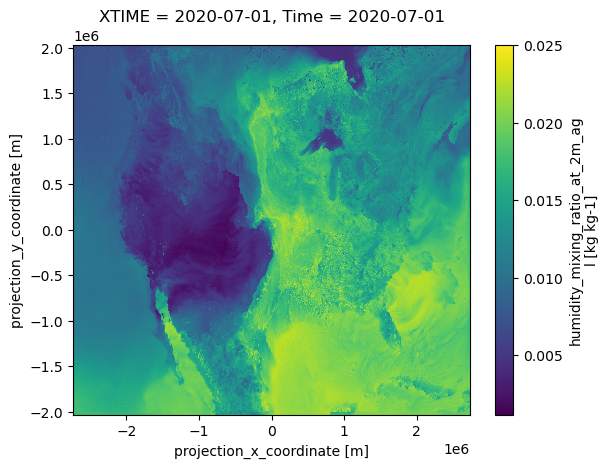

In [17]:
# basic xarray quick plot
# (note: lat and lon not in the file)

o_t2.plot()

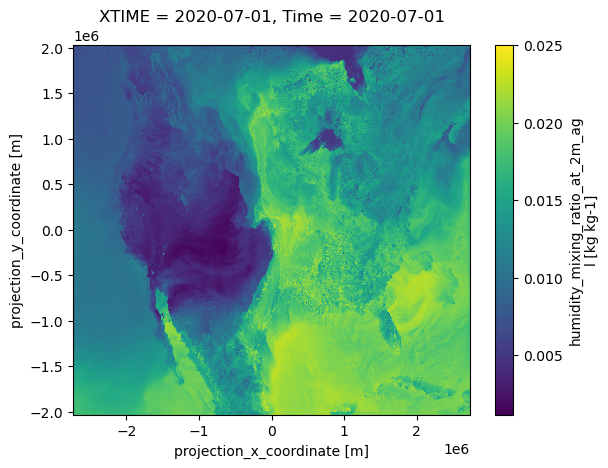

In [18]:
# compressed with GBR
c_t2.plot()

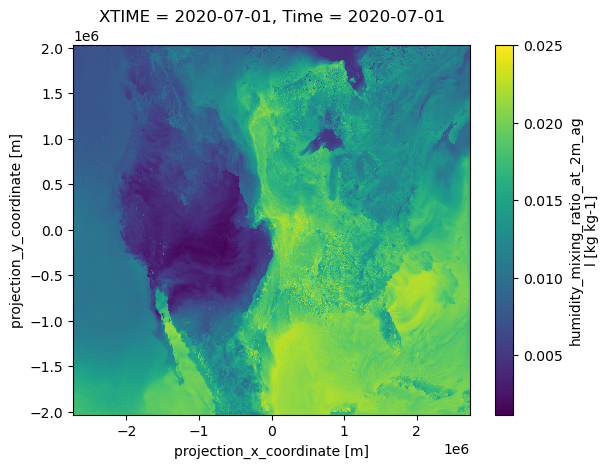

In [19]:
# compressed with sperr
sperr_t2.plot()

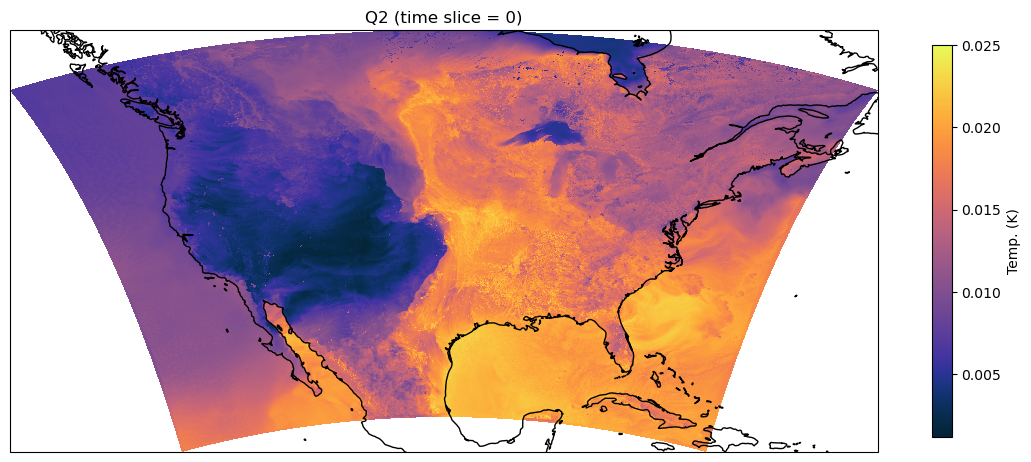

In [22]:
# incorporate correct projection as well as lat/lon info
fig = plt.figure(figsize=(14, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

mymap = cmocean.cm.thermal
tt = ax.pcolormesh(wrf_lon, wrf_lat, o_t2.data, cmap=mymap)
ax.set_title(var + " (time slice = 0)")
ax.coastlines()
fig.colorbar(tt, shrink=0.85, label="Temp. (K)")
plt.show()

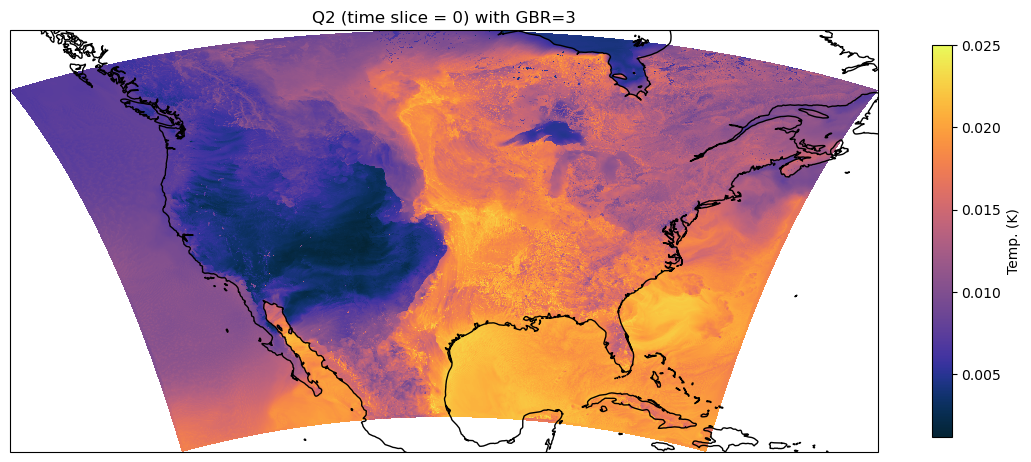

In [24]:
# incorporate correct projection as well as lat/lon info - GBR
fig = plt.figure(figsize=(14, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
mymap = cmocean.cm.thermal
tt = ax.pcolormesh(wrf_lon, wrf_lat, c_t2.data, cmap=mymap)
ax.set_title(var + " (time slice = 0) with GBR=3")
ax.coastlines()
fig.colorbar(tt, shrink=0.85, label="Temp. (K)")
plt.show()

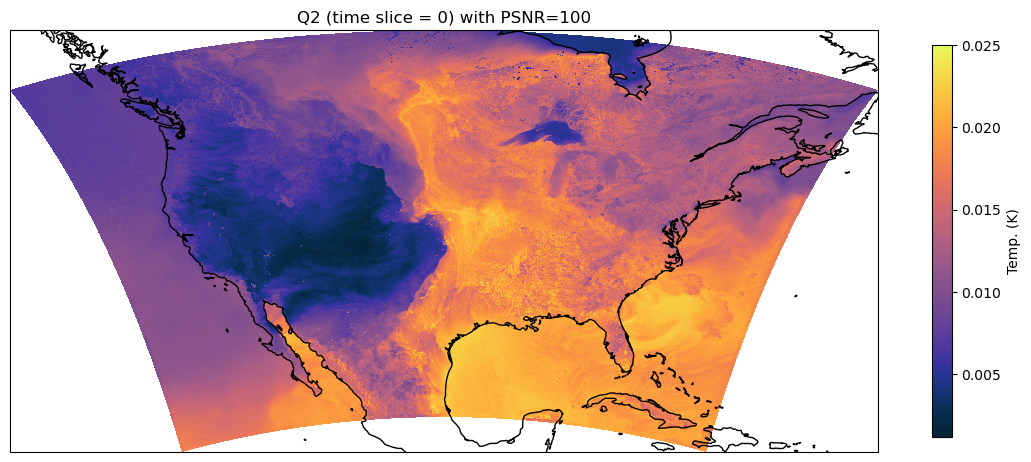

In [26]:
# incorporate correct projection as well as lat/lon info - SPERR p100
fig = plt.figure(figsize=(14, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
mymap = cmocean.cm.thermal
tt = ax.pcolormesh(wrf_lon, wrf_lat, sperr_t2.data, cmap=mymap)
ax.set_title(var + " (time slice = 0) with PSNR=100")
ax.coastlines()
fig.colorbar(tt, shrink=0.85, label="Temp. (K)")
plt.show()

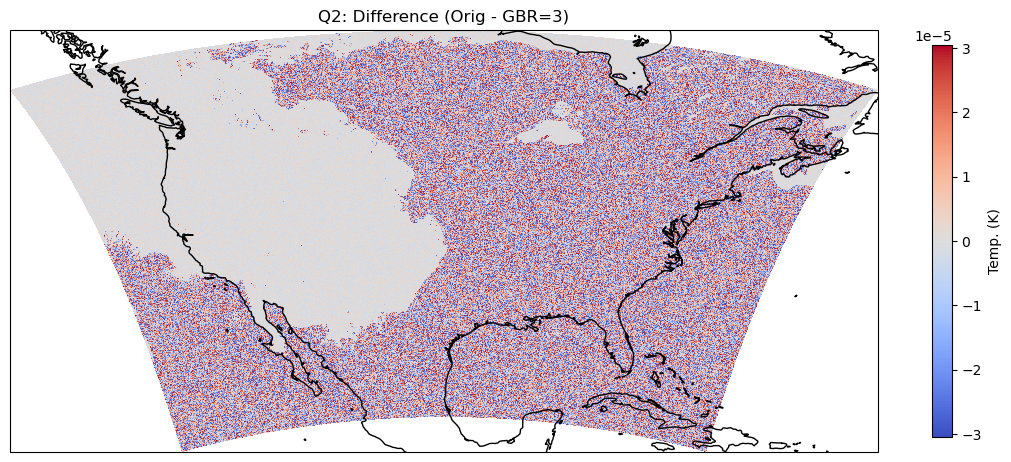

In [28]:
# plot the difference -GBR
diff_t2 = o_t2.data - c_t2.data
fig = plt.figure(figsize=(14, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
mymap = "coolwarm"
tt = ax.pcolormesh(wrf_lon, wrf_lat, diff_t2, cmap=mymap)
ax.set_title(var + ": Difference (Orig - GBR=3)")
ax.coastlines()
fig.colorbar(tt, shrink=0.85, label="Temp. (K)")
plt.show()

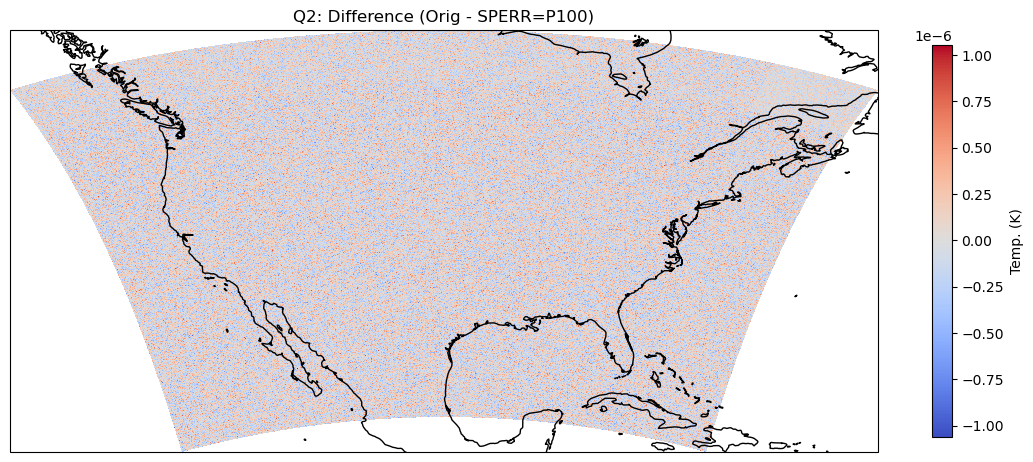

In [29]:
# plot the difference - sperr
sperr_diff_t2 = o_t2.data - sperr_t2.data
fig = plt.figure(figsize=(14, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
mymap = "coolwarm"
tt = ax.pcolormesh(wrf_lon, wrf_lat, sperr_diff_t2, cmap=mymap)
ax.set_title(var + ": Difference (Orig - SPERR=P100)")
ax.coastlines()
fig.colorbar(tt, shrink=0.85, label="Temp. (K)")
plt.show()

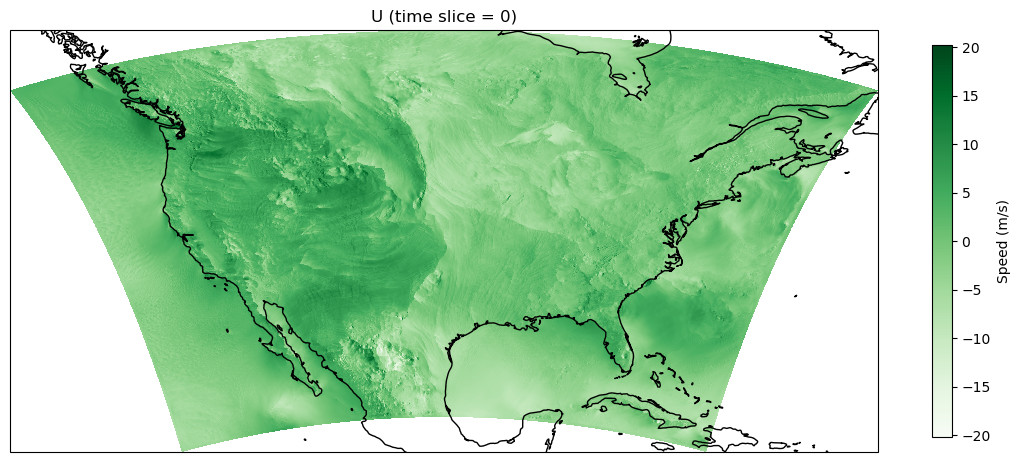

In [30]:
# if look at U or V, need different lat/lon values
# let's look at U
o_u = ds_o_2d["U"].isel(Time=0)
c_u = ds_c_2d["U"].isel(Time=0)
sperr_u = ds_sperr_2d["U"].isel(Time=0)

fig = plt.figure(figsize=(14, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
mymap = "Greens"
tt = ax.pcolormesh(wrf_lon_u, wrf_lat_u, o_u.data, cmap=mymap)
ax.set_title("U (time slice = 0)")
ax.coastlines()
fig.colorbar(tt, shrink=0.85, label="Speed (m/s)")
plt.show()

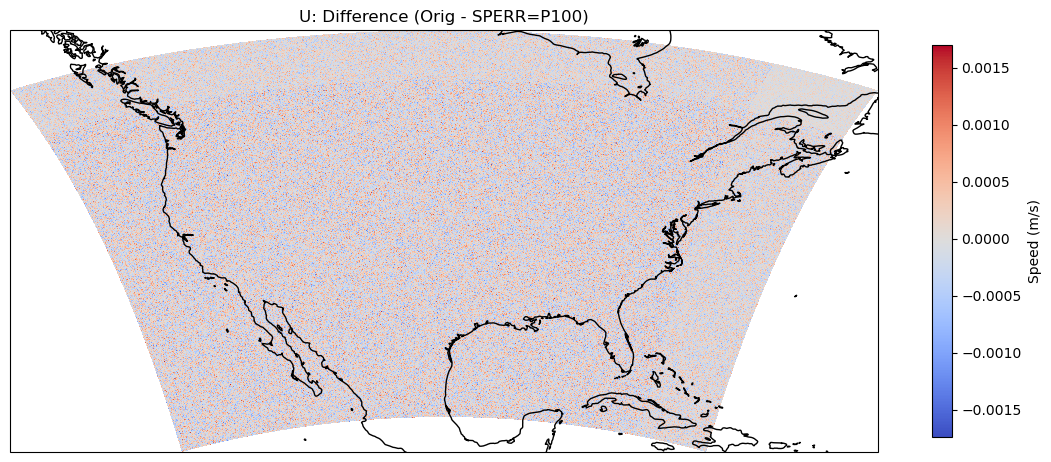

In [34]:
# plot the difference for u (SPERR)
sperr_diff_u = o_u.data - sperr_u.data
fig = plt.figure(figsize=(14, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
mymap = "coolwarm"
tt = ax.pcolormesh(wrf_lon_u, wrf_lat_u, sperr_diff_u, cmap=mymap)
ax.set_title("U: Difference (Orig - SPERR=P100)")
ax.coastlines()
fig.colorbar(tt, shrink=0.85, label="Speed (m/s)")
plt.show()

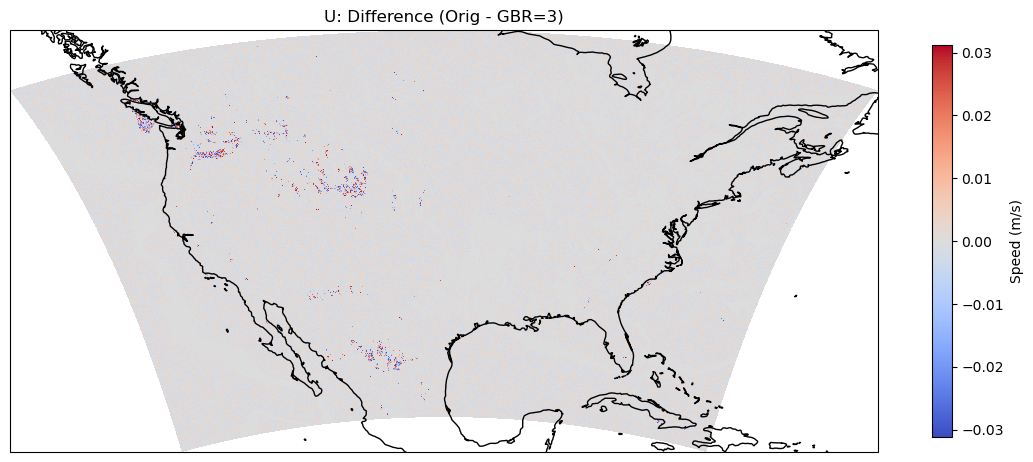

In [32]:
# plot the difference for u (GBR)
diff_u = o_u.data - c_u.data
fig = plt.figure(figsize=(14, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
mymap = "coolwarm"
tt = ax.pcolormesh(wrf_lon_u, wrf_lat_u, diff_u, cmap=mymap)
ax.set_title("U: Difference (Orig - GBR=3)")
ax.coastlines()
fig.colorbar(tt, shrink=0.85, label="Speed (m/s)")
plt.show()

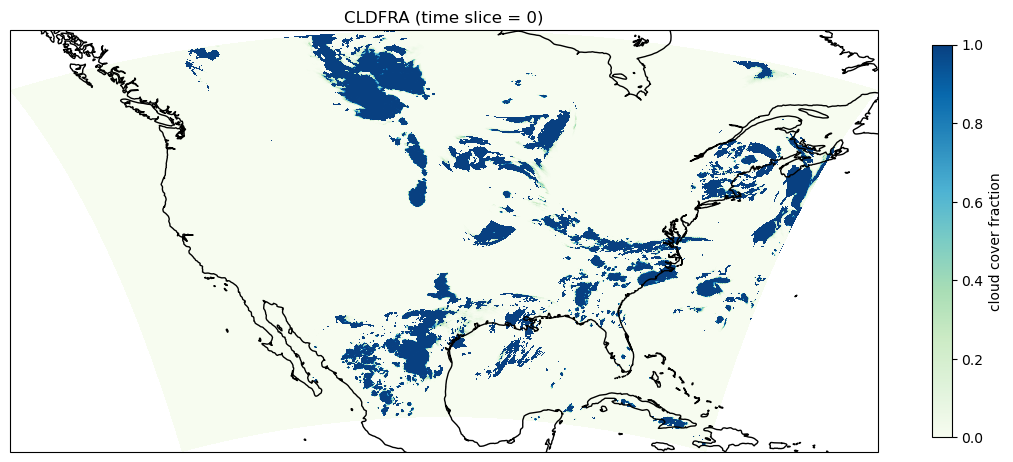

In [35]:
# now do a 3d field - can just compare a single level (there are 50 levels)
cld_slice = ds_o_3d["CLDFRA"].isel(Time=0).isel(z=30)

fig = plt.figure(figsize=(14, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
mymap = "GnBu"
tt = ax.pcolormesh(wrf_lon, wrf_lat, cld_slice.data, cmap=mymap)
ax.set_title("CLDFRA (time slice = 0)")
ax.coastlines()
fig.colorbar(tt, shrink=0.85, label="cloud cover fraction")
plt.show()